In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Generate 100 two-dimensional data points centered around (1, 1) for Category 1
category_1 = np.random.normal(loc=(1, 1), scale=1, size=(100, 2))

# Generate 100 two-dimensional data points centered around (5, 5) for Category 2
category_2 = np.random.normal(loc=(5, 5), scale=1, size=(100, 2))

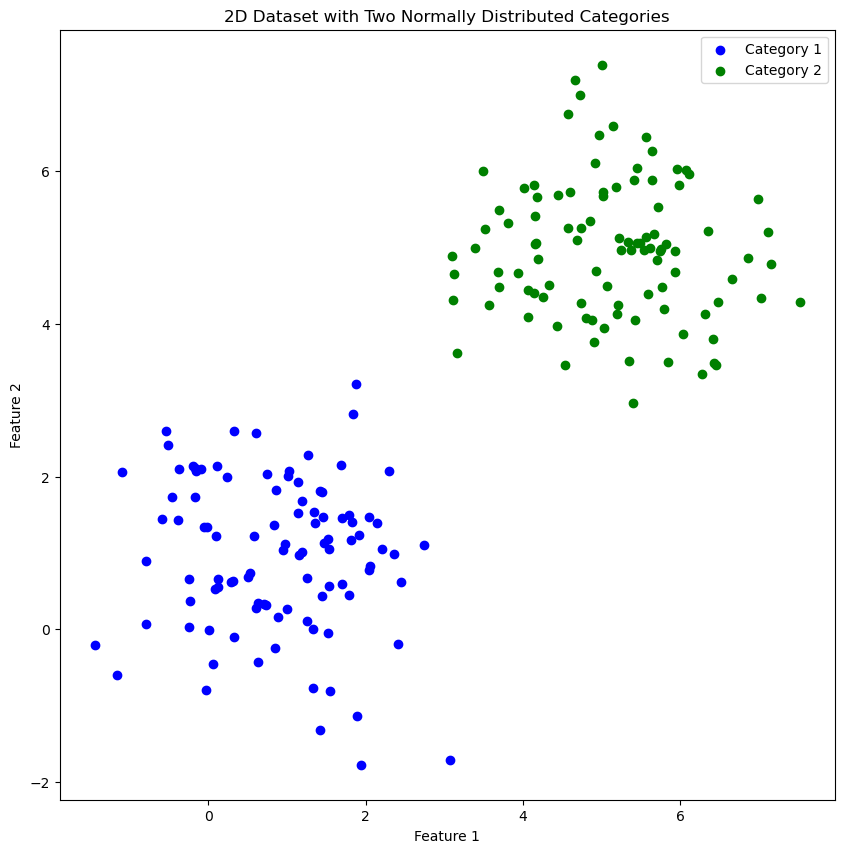

In [44]:
# Generate 100 samples for Category 1 centered at (1, 1) with standard deviation 1
category_1 = np.random.normal(loc=(1, 1), scale=1, size=(100, 2))

# Generate 100 samples for Category 2 centered at (5, 5) with standard deviation 1
category_2 = np.random.normal(loc=(5, 5), scale=1, size=(100, 2))

# Stack both categories vertically to create a single dataset of 200 samples
data = np.vstack((category_1, category_2))

# Create a scatter plot of the two categories
plt.figure(figsize=(10, 10))
plt.scatter(data[:100, 0], data[:100, 1], color='blue', label='Category 1')   # Plot Category 1
plt.scatter(data[100:, 0], data[100:, 1], color='green', label='Category 2')  # Plot Category 2
plt.title('2D Dataset with Two Normally Distributed Categories')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [45]:
# Calculate the Euclidean distance between two points in multi-dimensional space
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Randomly select 'k' unique data points from the dataset to serve as the initial centroids
def initialize_centroids(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False)]


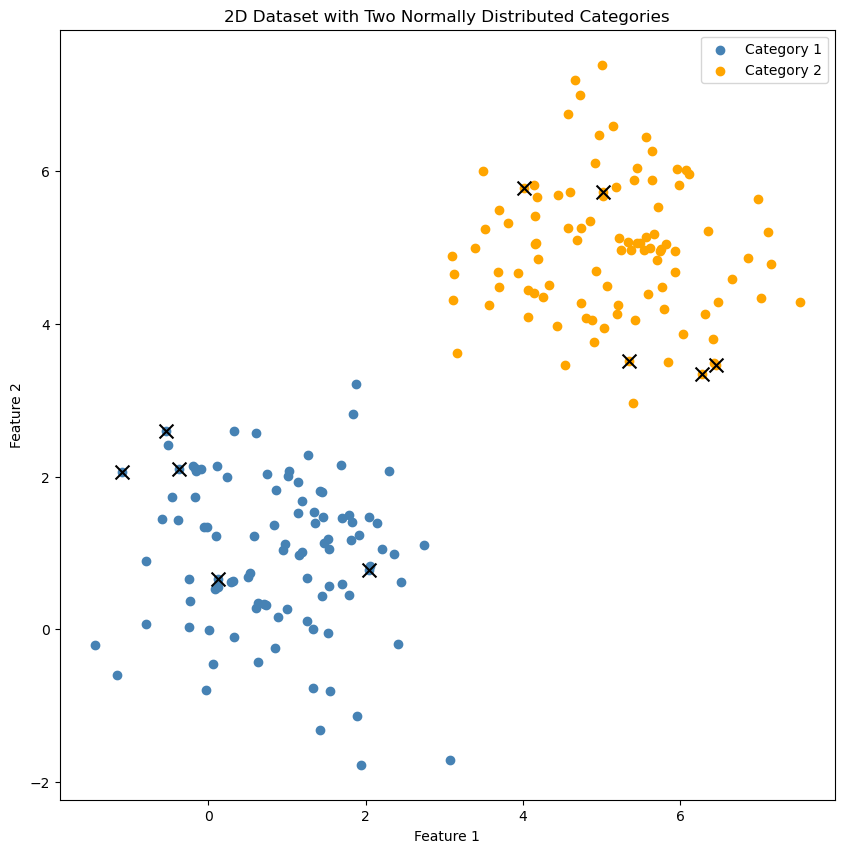

In [46]:
# Randomly select a value for K (number of clusters) between 1 and 10
k = np.random.randint(1, 11)

# Initialize 'k' centroids randomly from the dataset
centroids = initialize_centroids(data[:, :2], k)

# Plot the 2D dataset with two categories
plt.figure(figsize=(10, 10))
plt.scatter(data[:100, 0], data[:100, 1], color='steelblue', label='Category 1')  # Plot Category 1
plt.scatter(data[100:, 0], data[100:, 1], color='orange', label='Category 2')     # Plot Category 2
plt.title('2D Dataset with Two Normally Distributed Categories')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot the initialized centroids
for i in range(k):
    plt.scatter(centroids[i, 0], centroids[i, 1], color='black', marker='x', s=100, label=f'Centroid {i+1}')


In [ ]:
def assign_clusters(data, centroids):
    # Assigns each data point to the nearest centroid based on Euclidean distance
    clusters = np.zeros(data.shape[0], dtype=int)
    for i in range(data.shape[0]):
        distances = np.array([euclidean_distance(data[i], centroid) for centroid in centroids])
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(data, clusters, k):
    # Updates the centroids by computing the mean of all data points assigned to each cluster
    updated_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        points_in_cluster = data[clusters == i]
        if len(points_in_cluster) > 0:
            updated_centroids[i] = np.mean(points_in_cluster, axis=0)
    return updated_centroids

def k_means(data, k, max_iterations=100):
    # Performs the K-Means clustering algorithm with a fixed number of clusters and iterations
    centroids = initialize_centroids(data, k)
    for i in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        updated_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == updated_centroids):
            break
        centroids = updated_centroids
    return clusters, centroids


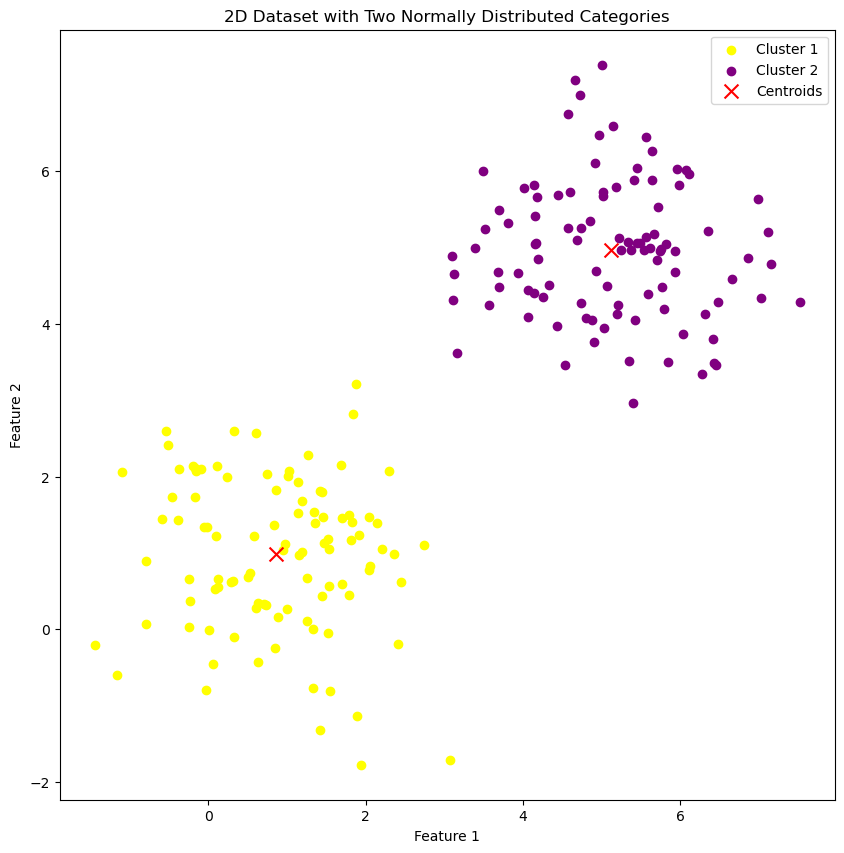

In [48]:
# K-means clustering
k = 2  
clusters, centroids = k_means(data, k)

# Plot the clustered data
plt.figure(figsize=(10, 10))
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], color='yellow', label='Cluster 1')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], color='purple', label='Cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('2D Dataset with Two Normally Distributed Categories')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()



In [50]:
import gzip
import struct
from datetime import datetime

def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Load the MNIST dataset
training_images = read_idx('MNIST/train-images-idx3-ubyte.gz')
training_labels = read_idx('MNIST/train-labels-idx1-ubyte.gz')
test_images = read_idx('MNIST/t10k-images-idx3-ubyte.gz')
test_labels = read_idx('MNIST/t10k-labels-idx1-ubyte.gz')

# Flatten the images
training_images = training_images.reshape(-1, 28*28)
test_images = test_images.reshape(-1, 28*28)

# Normalize the pixel values to be between 0 and 1
training_images = training_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

# Start timing the K-means clustering process
start_time = datetime.now()

# Run K-means clustering on the MNIST dataset 
k = 10 
clusters, centroids = k_means(training_images, k)

# End timing the K-means clustering process
end_time = datetime.now()
print("Training time:", end_time - start_time)


Training time: 0:13:44.488759


In [51]:
def assign_labels_to_clusters(clusters, true_labels, k): 
    labels = np.zeros_like(clusters) 
    for i in range(k): 
        mask = (clusters == i) 
        # Assign the most common label to the centroid 
        labels[mask] = np.bincount(true_labels[mask]).argmax() 
    return labels

def manual_accuracy_score(true_labels, predicted_labels): 
    correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels)) 
    accuracy = correct_predictions / len(true_labels) 
    return accuracy

# Assign labels to clusters based on the most common label in each cluster
predicted_labels = assign_labels_to_clusters(clusters, training_labels, k)

# Calculate the accuracy of the clustering
accuracy = manual_accuracy_score(training_labels, predicted_labels)
print('Manual Accuracy of K-means clustering on MNIST dataset: ', accuracy)

Manual Accuracy of K-means clustering on MNIST dataset:  0.5908


In [54]:
import sklearn
from sklearn.cluster import MiniBatchKMeans

k_values = [10, 16, 64, 256]
models = {}
inertias = {}

for k in k_values:
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=3584, random_state=42)
    mbk.fit(training_images)
    models[k] = mbk
    inertias[k] = mbk.inertia_
    print(f"Inertia when K={k}: {mbk.inertia_}")

# Sets best k and model with one of lowest inertia
best_k = min(inertias, key=inertias.get)
best_model = models[best_k]

# Predict cluster assignments for test data
test_clusters = best_model.predict(test_images)
print(f"Inertia of the best model on the test data: (K={best_k}):", best_model.inertia_)


Inertia when K=10: 2385984.5
Inertia when K=16: 2216898.25
Inertia when K=64: 1804759.75
Inertia when K=256: 1497835.375
Inertia of the best model on the test data: (K=256): 1497835.375
